# Producing figures with multi-channel images

The ```microplot``` module contains tools to create figures containing multi-channel images. It offers basic tools to turn 2D images into RGB images using specific color maps, combine multiple channels, create figures, adding labels and scale bars.

In [4]:
#%load_ext autoreload
#%autoreload 2

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import skimage.io

from microfilm import microplot

## Load images

Most functions of the ```microplot``` module take as input either Numpy arrays or lists of Numpy arrays. Here we load a dataset and extract a single time point containing two channels. We extract both a stack with both channels in a single array and two separate images for the purpose of illustration:

In [28]:
image = skimage.io.imread('../microfilm/dataset/tests/Sample/mitosis.tif')
image.shape

(51, 5, 2, 196, 171)

This image has 52 time points, 5 z-stacks, 2 channels. We take the first time-point and project in in z to have single-plane images:

In [29]:
multi_channel = image[0].max(axis=0)
multi_channel.shape

(2, 196, 171)

We also isolate each channel:

In [31]:
image1 = multi_channel[0]
image2 = multi_channel[1]

In [32]:
print(f'image shape: {image1.shape}')
print(f'image type: {image1.dtype}')

image shape: (196, 171)
image type: uint16


## Creating a default plot

We can use the ```microshow``` function to plot our multi-channel image. If no options are passed, by default the image will be represented using an RGB color scheme and there won't be any additional labels:

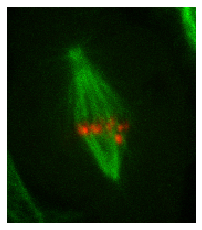

In [35]:
microim = microplot.microshow(images=multi_channel)

We can also pass a list of images:

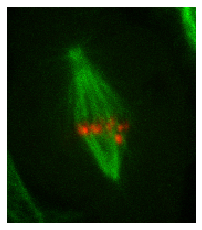

In [34]:
microim = microplot.microshow(images=[image1, image2])

### Options at creation

When we create the image, we have a large set of options that we can use to adjust the plot. For example, we can select specific color maps ```cmaps```, add a scale bar, and a label:

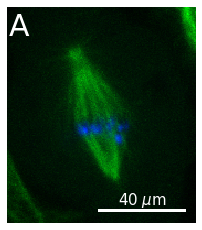

In [37]:
microim = microplot.microshow(images=[image1, image2], cmaps=['pure_blue','pure_green'],
                              scalebar=True, unit='um', unit_per_pix=0.5, scalebar_units=40,
                              scale_text_centered=True, scale_font_size=15,
                             label_text='A', label_font_size=30);

### Methods

Alternatively to passing all options at the moment of figure creation, we can also first create the plot and then modify it. For example we can use the ```add_label```  and ```add_scalenar``` methods:

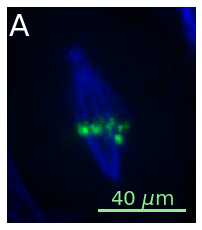

In [41]:
microim = microplot.microshow(images=[image1, image2], cmaps=['pure_green', 'pure_blue'])
microim.add_scalebar(unit='um', unit_per_pix=0.5, scalebar_units=40,
                              scale_text_centered=True, scale_color='lightgreen', scale_font_size=20)
microim.add_label(label_text='A', label_font_size=30);

## Relation to Matplotlib

In the same spirit as e.g. the seaborn library, the microplot module stays very close to Matplotlib, so that you can integrate the image plots into larger figures. For example when you create a figure, you can pass an existing axis object instead of creating a new one. If you want a figure with a grid of plots, you can pass the appropriate axis for your image:

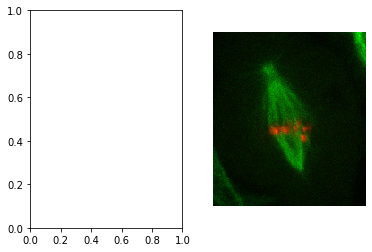

In [42]:
fig, ax = plt.subplots(1,2)
microim = microplot.microshow(images=[image1, image2], ax=ax[1]);

## The Microimage object

When calling ```microshow```, a ```Microimage``` instance is returned which gives you access to the Matplotlib```axis``` object. You can use it as usual in Matplotlib and for example revert some defaults:

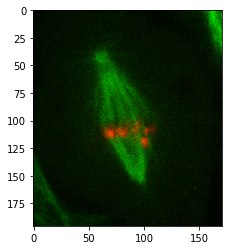

In [43]:
microim = microplot.microshow(images=[image1, image2])
microim.ax.set_axis_on()

We can then of course combine multiple plots together:

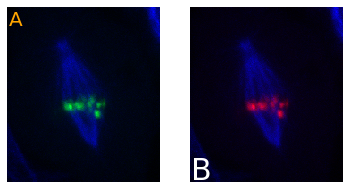

In [47]:
fig, ax = plt.subplots(1,2)
micro1 = microplot.microshow(images=multi_channel, cmaps=['pure_green', 'pure_blue'],
                              unit_per_pix=0.5, scalebar_units=40, unit='um', 
                    scale_text_centered=True, scale_font_size=20, scale_color='white', ax=ax[0]);
micro2 = microplot.microshow(images=multi_channel, cmaps=['pure_red', 'pure_blue'],
                              unit_per_pix=0.5, scalebar_units=40, unit='um',
                    scale_font_size=None, scale_color='lightgreen', ax=ax[1]);

micro1.add_label('A', label_location='upper left', label_font_size=20, label_color='orange')
micro2.add_label('B', label_location='lower left', label_font_size=30);

## Lower level functions

When calling ```microshow```, several internal functions are used, e.g. to rescale the image intensity, combined multiple colormaps etc. You also have access to these functions individually.

### Convert image to display with chosen colormap

Using the ```colormap_from_name``` function, you can turn a single 2D array into a RGB image with a certain colormap. You can use any colormap from Matplotlib. Additionally, since Matplotlib doesn't offer plain colormaps from black to a given color (used very often in microcopy), you can also specify one of ```pure_green```, ```pure_red```, ```pure_blue```:

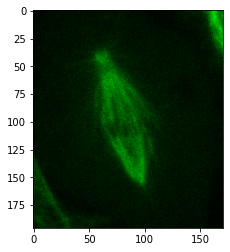

In [49]:
im_green = microplot.colormap_from_name(image2, cmap_name='pure_green', flip_map=False, rescale_type='min_max')
plt.imshow(im_green);

By default the image intensity is rescaled using the min-max values. This is often sub-optimal (e.g. if single pixels are way out of the distribution) and you can specify another rescaling. For example you can explicitly provide lower and upper limits:

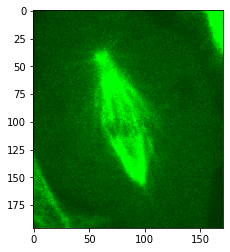

In [50]:
im_green = microplot.colormap_from_name(image2, cmap_name='pure_green', flip_map=False, rescale_type='limits',
                                       limits=[100,10000])
plt.imshow(im_green);

### colormap hex

Alternatively to the keyword based map, you can also use a hexadecimal encoding of a color to create an colormap ranging from black to that color. This gives more flexibility:

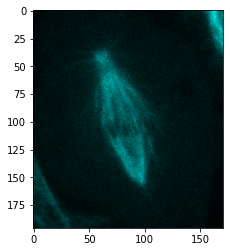

In [52]:
heximage = microplot.colormap_from_colorhex(image2, cmap_hex='#00ffff')
plt.imshow(heximage);

### Combining images

After having converted images to a given colormap, you can combine them into a single image with overlayed colors (currently using a maximum projection in the RGB space). You can simply use the ```combine_image``` function for that:

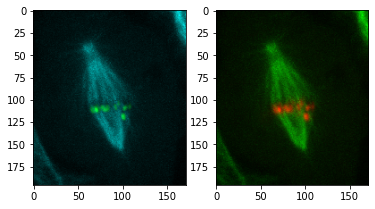

In [53]:
im1_mapped = microplot.colormap_from_name(image1, cmap_name='pure_green')
im2_mapped = microplot.colormap_from_colorhex(image2, cmap_hex='#00ffff')


im1_mapped_b = microplot.colormap_from_name(image1, cmap_name='pure_red')
im2_mapped_b = microplot.colormap_from_name(image2, cmap_name='pure_green')

combined = microplot.combine_image([im1_mapped, im2_mapped])
combined_b = microplot.combine_image([im1_mapped_b, im2_mapped_b])

fig, ax = plt.subplots(1,2)
ax[0].imshow(combined)
ax[1].imshow(combined_b);

### Direct conversion

To save some steps you can also directly use a list of images and of colormaps to create a combined image:

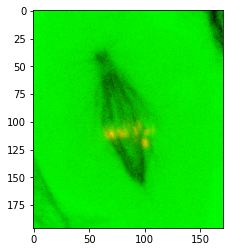

In [56]:
converted = microplot.multichannel_to_rgb(images=[image1, image2], cmaps=['pure_red', 'pure_green'], flip_map=[False, True])
plt.imshow(converted);

Most of these functions also work directly with Numpy arrays:

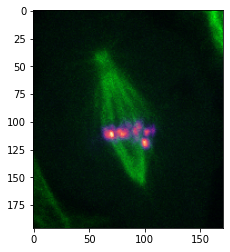

In [57]:
converted = microplot.multichannel_to_rgb(images=multi_channel, cmaps=['magma', 'pure_green'])
plt.imshow(converted);

## The scalebar

We have seen above, that you could add a scalebar to the image. For that you only need to defined the ```unit``` you use e.g. um, the size per pixel ```unit_per_pixel``` e.g. 0.5um/pixels, and the size of the scale bar ```scalebar_units``` in your unit e.g. 40um:

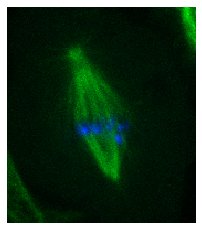

In [59]:
microim = microplot.microshow(images=multi_channel, cmaps=['pure_blue', 'pure_green'],
                              unit='um', unit_per_pix=0.5, scalebar_units=40,
                              scale_text_centered=True, scale_color='lightgreen', scale_font_size=20);

## Export

As the figure is simply a Matplotlib figure, you can just use the regular ```savefig``` function (and use [this trick](https://stackoverflow.com/a/27227718) to avoid white space around the plot). For a singe image we can access the figure from the axis itself:

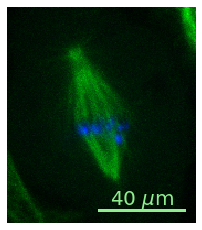

In [61]:
microim = microplot.microshow(images=multi_channel, cmaps=['pure_blue', 'pure_green'],
                              scalebar=True, unit='um', unit_per_pix=0.5, scalebar_units=40,
                              scale_text_centered=True, scale_color='lightgreen', scale_font_size=20);
microim.ax.figure.savefig('single.png', bbox_inches = 'tight', pad_inches = 0, dpi=600)

And for more complex plots, you can just use the regular figure creation:

Text(0.01, 0.01, 'B')

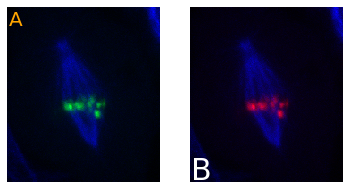

In [63]:
fig, ax = plt.subplots(1,2)
micro1 = microplot.microshow(images=multi_channel, cmaps=['pure_green', 'pure_blue'],
                              unit_per_pix=0.5, scalebar_units=40, unit='um', 
                    scale_text_centered=True, scale_font_size=20, scale_color='white', ax=ax[0]);
micro2 = microplot.microshow(images=multi_channel, cmaps=['pure_red', 'pure_blue'],
                              unit_per_pix=0.5, scalebar_units=40, unit='um',
                    scale_font_size=None, scale_color='lightgreen', ax=ax[1]);

micro1.add_label('A', label_location='upper left', label_font_size=20, label_color='orange')
micro2.add_label('B', label_location='lower left', label_font_size=30)

In [64]:
fig.savefig('figure.png', bbox_inches = 'tight', pad_inches = 0, dpi=600)

In [65]:
fig.savefig('figure.pdf', bbox_inches = 'tight', pad_inches = 0, dpi=600)